In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
# directory = 'C:/Users/Erez/Data/Diffraction/20231003_SB8_SB16_Cchip/data/MM_trenchwise/'
# GFPnoAdj = Path(directory).glob('GFP_noAdj*')
# GFP0 = pd.DataFrame({})
# for x in GFPnoAdj:
#     cell = pd.read_csv(x)
#     # print(cell)
#     GFP0 = pd.concat([GFP0, cell], ignore_index=True)
# GFP0.head(100)

In [4]:
directory = 'MM_trechwise/MM_trechwise_comp/'
RFP_1n = Path(directory + 'RFP_1n').glob('main*')
RFP1main = pd.DataFrame({})
for x in RFP_1n:
    cell = pd.read_csv(x)
    RFP1main = pd.concat([RFP1main, cell], ignore_index=True)
# RFP1main.head(100)
RFP_1n = Path(directory + 'RFP_1n').glob('side*')
RFP1side = pd.DataFrame({})
for x in RFP_1n:
    cell = pd.read_csv(x)
    RFP1side = pd.concat([RFP1side, cell], ignore_index=True)
RFP_1n = Path(directory + 'RFP_1n').glob('background_m*')
RFP1bgm = pd.DataFrame({})
for x in RFP_1n:
    cell = pd.read_csv(x)
    RFP1bgm = pd.concat([RFP1bgm, cell], ignore_index=True)
# RFP1main.head(100)
RFP_1n = Path(directory + 'RFP_1n').glob('background_s*')
RFP1bgs = pd.DataFrame({})
for x in RFP_1n:
    cell = pd.read_csv(x)
    RFP1bgs = pd.concat([RFP1bgs, cell], ignore_index=True)

In [5]:
n1_ratio = ((RFP1main['Mean'].values - RFP1bgm['Mean'].values)/
            (RFP1side['I_nb'].values - RFP1bgs['Mean'].values)).tolist()

In [6]:
RFP_2n = Path(directory + 'RFP_2n').glob('main*')
RFP2main = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2main = pd.concat([RFP2main, cell], ignore_index=True)
RFP_2n = Path(directory + 'RFP_2n').glob('background_m*')
RFP2bgm = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2bgm = pd.concat([RFP2bgm, cell], ignore_index=True)

In [7]:
RFP_2n = Path(directory + 'RFP_2n').glob('side*a*')
RFP2sideA = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2sideA = pd.concat([RFP2sideA, cell], ignore_index=True)
    
RFP_2n = Path(directory + 'RFP_2n').glob('background_s*a*')
RFP2bgsA = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2bgsA = pd.concat([RFP2bgsA, cell], ignore_index=True)

RFP_2n = Path(directory + 'RFP_2n').glob('side*b*')
RFP2sideB = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2sideB = pd.concat([RFP2sideB, cell], ignore_index=True)

RFP_2n = Path(directory + 'RFP_2n').glob('background_s*b*')
RFP2bgsB = pd.DataFrame({})
for x in RFP_2n:
    cell = pd.read_csv(x)
    RFP2bgsB = pd.concat([RFP2bgsB, cell], ignore_index=True)
    
RFP2bgsA.head(100)

,Slice,Mean
0,1,108.56084
1,2,108.88360
2,3,108.98016
3,4,109.85847
4,5,108.93651
...,...,...
83,11,107.88947
84,12,108.08685
85,13,106.75088
86,14,106.98772


In [8]:
n2_ratio = ((RFP2main['Mean'].values - RFP2bgm['Mean'].values)/
            (((RFP2sideA['Mean'].values - RFP2bgsA['Mean'].values) +
              (RFP2sideB['Mean'].values - RFP2bgsB['Mean'].values))/2)).tolist()

In [9]:
print(n1_ratio)
# print(n2_ratio)

[0.0008549682642872368, 0.0006934456222117833, 0.002263366020492116, 0.0010626756524075018, 0.0003362467389085423, -0.0002677891233603787, 0.0005264436042270681, 0.0012886506880802834, 0.0022564505955698995, 0.000908928216159496, 0.0017476990556902564, 4.765660648856895e-05, 0.0010305546029621792, 0.002512686436264809, 0.0011839838603553907, 0.002838024133707677, 0.0024712236056185877, 0.0019698867487805785, -0.00014108973885343533, 0.004634789107397238, 0.0006772455604476502, 0.003792729507486894, 0.0043941890320083055, 0.0018443884580798407, 0.004871510205294065, 0.005550896870982577, 0.0033009712542525485, 0.0013348517874061184, 0.003661033455690253, 0.0010507253036668056, 0.0006352930150825448, 0.0009825061198377974, 0.0014732115236697706, 0.00051948506294136, 0.00045152781192655736, -0.0007000955143302206, -0.0002902283565778485, -0.0010649062848635572, -7.807751600224815e-05, -0.0007479042052830482, 4.0461690465946724e-05, 0.0008338634907911827, -0.001481013158862992, 0.000177008

In [10]:
trench_diff = pd.DataFrame({"Normalised Ratio": n1_ratio + n2_ratio,
                            "Fluo Neighbour": ["One Adjacent Trench"] * len(n1_ratio) + 
                                              ["Two Adjacent Trench"] * len(n2_ratio)})

In [11]:
trench_diff

,Normalised Ratio,Fluo Neighbour
0,0.000855,One Adjacent Trench
1,0.000693,One Adjacent Trench
2,0.002263,One Adjacent Trench
3,0.001063,One Adjacent Trench
4,0.000336,One Adjacent Trench
...,...,...
170,-0.000582,Two Adjacent Trench
171,0.001345,Two Adjacent Trench
172,-0.000744,Two Adjacent Trench
173,-0.000693,Two Adjacent Trench


NameError: name 'data' is not defined

Text(0.5, 1.0, 'Trench-wise comparison (RFP)')

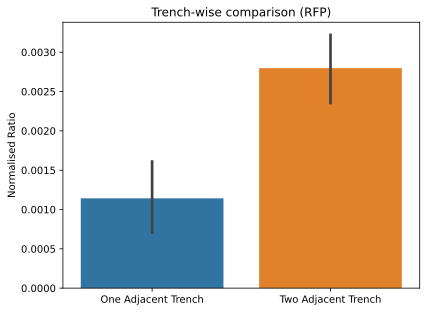

In [12]:
bar_plot = sns.barplot(data = trench_diff, x='Fluo Neighbour', y='Normalised Ratio')
# bar_plot.set_ylim(100, 120)
bar_plot.set_xlabel("")
bar_plot.set_title("Trench-wise comparison (RFP)")
# plt.show()
#plt.savefig(directory + '/trench-wise.pdf')

In [13]:
directory2 = 'MM_withintrench.'
RFP_d = Path(directory2).glob('*2*')
RFP_df = pd.DataFrame({})
for x in RFP_d:
    print(x)
    cell = pd.read_csv(x)
    RFP_df = pd.concat([RFP_df, cell], ignore_index=True)
RFP_df.head(10)

""


In [14]:
RFP_df = pd.read_csv("bleedthrough_in_trench_2.csv")

<AxesSubplot:xlabel='number_of_cells', ylabel='bleed_through'>

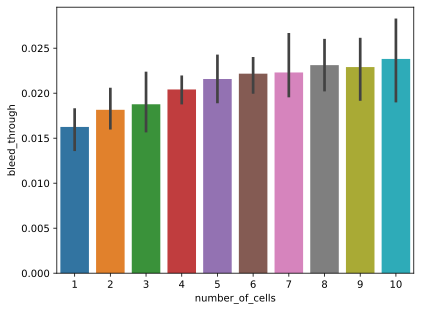

In [16]:
sns.barplot(data=RFP_df, x='number_of_cells', y='bleed_through')
# plt.show()
#plt.savefig(directory2 + '/vertical_bleed_through.pdf')